In [1]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 

In [6]:
lung_cancer = pd.read_csv("lung_cancer.csv")
print(lung_cancer.describe())
lung_cancer.dtypes

              AGE     SMOKING  YELLOW_FINGERS     ANXIETY  PEER_PRESSURE  \
count  309.000000  309.000000      309.000000  309.000000     309.000000   
mean    62.673139    1.563107        1.569579    1.498382       1.501618   
std      8.210301    0.496806        0.495938    0.500808       0.500808   
min     21.000000    1.000000        1.000000    1.000000       1.000000   
25%     57.000000    1.000000        1.000000    1.000000       1.000000   
50%     62.000000    2.000000        2.000000    1.000000       2.000000   
75%     69.000000    2.000000        2.000000    2.000000       2.000000   
max     87.000000    2.000000        2.000000    2.000000       2.000000   

       CHRONIC DISEASE    FATIGUE     ALLERGY     WHEEZING  ALCOHOL CONSUMING  \
count       309.000000  309.000000  309.000000  309.000000         309.000000   
mean          1.504854    1.673139    1.556634    1.556634           1.556634   
std           0.500787    0.469827    0.497588    0.497588           0.4

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object

In [7]:
# Considering only numerical data
lc_gender = lung_cancer.GENDER 
lc_cancer = lung_cancer.LUNG_CANCER
lc = lung_cancer.iloc[:,1:13]
display(lc.head())
# Converting into numpy array
LC = lc.values
LC

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH
0,69,1,2,2,1,1,2,1,2,2,2,2
1,74,2,1,1,1,2,2,2,1,1,1,2
2,59,1,1,1,2,1,2,1,2,1,2,2
3,63,2,2,2,1,1,1,1,1,2,1,1
4,63,1,2,1,1,1,1,1,2,1,2,2


array([[69,  1,  2, ...,  2,  2,  2],
       [74,  2,  1, ...,  1,  1,  2],
       [59,  1,  1, ...,  1,  2,  2],
       ...,
       [58,  2,  1, ...,  2,  2,  1],
       [67,  2,  1, ...,  2,  2,  2],
       [62,  1,  1, ...,  2,  1,  1]])

In [8]:
# Normalizing the numerical data 
lc_normal = scale(LC)

In [9]:
lc_normal

array([[ 0.77185028, -1.13529242,  0.86929961, ...,  0.892475  ,
         0.85220712,  0.74873631],
       [ 1.38182914,  0.88083033, -1.15035137, ..., -1.12047956,
        -1.17342366,  0.74873631],
       [-0.44810745, -1.13529242, -1.15035137, ..., -1.12047956,
         0.85220712,  0.74873631],
       ...,
       [-0.57010322,  0.88083033, -1.15035137, ...,  0.892475  ,
         0.85220712, -1.33558369],
       [ 0.52785873,  0.88083033, -1.15035137, ...,  0.892475  ,
         0.85220712,  0.74873631],
       [-0.08212013, -1.13529242, -1.15035137, ...,  0.892475  ,
        -1.17342366, -1.33558369]])

In [10]:
pca = PCA()
pca_values = pca.fit_transform(lc_normal)

In [11]:
pca_values

array([[-0.5992681 , -0.82670157, -1.64857164, ..., -1.1282923 ,
        -0.32888305,  0.20855825],
       [-0.51675522, -0.75658333,  1.86583082, ...,  1.04521741,
        -0.01960668,  0.20514115],
       [-1.05073044, -1.81406447, -0.40902066, ...,  0.1747297 ,
         0.90320271, -0.5866862 ],
       ...,
       [-1.73566666,  1.92779362,  0.74240534, ...,  1.00770623,
        -0.06428496, -0.35325591],
       [-1.07115431, -0.41809624,  0.54261257, ..., -0.98814309,
        -0.1964619 , -0.99078391],
       [-1.07596939,  1.16548873, -0.02912186, ...,  0.11881334,
         0.36939211,  0.26987732]])

In [12]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.19738304, 0.13898682, 0.11819402, 0.09757557, 0.08245223,
       0.07999404, 0.0737218 , 0.05768713, 0.05030355, 0.04635973,
       0.03096598, 0.02637609])

In [13]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 19.74,  33.64,  45.46,  55.22,  63.47,  71.47,  78.84,  84.61,
        89.64,  94.28,  97.38, 100.02])

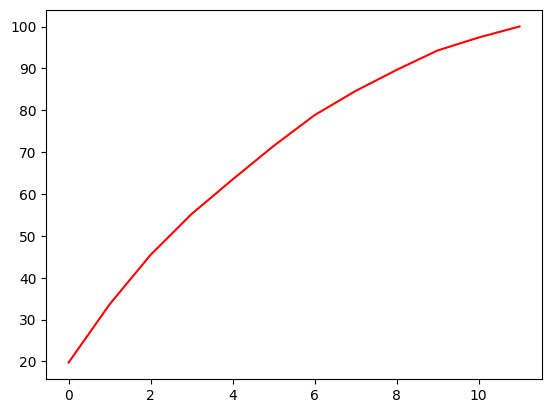

In [14]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="red")

In [15]:
pca_values[:,0:1]

array([[-0.5992681 ],
       [-0.51675522],
       [-1.05073044],
       [ 1.97396716],
       [-0.41537529],
       [-1.35342298],
       [-1.99101373],
       [ 1.84379894],
       [ 1.33741778],
       [ 2.18741131],
       [ 1.03037733],
       [-2.80169448],
       [ 0.02627209],
       [-2.60454801],
       [-1.81921494],
       [ 0.33907208],
       [-2.19218775],
       [ 2.7249926 ],
       [ 1.66572391],
       [-0.0721355 ],
       [ 2.59619787],
       [ 0.9551593 ],
       [-0.11420439],
       [-2.61973861],
       [ 0.60640017],
       [-0.5688869 ],
       [ 0.55231392],
       [-1.12668342],
       [ 1.03400546],
       [-1.40617163],
       [ 1.28897861],
       [-0.56329372],
       [ 2.20981162],
       [ 2.25753269],
       [ 2.42361445],
       [ 2.31829508],
       [-0.26132004],
       [-0.3124617 ],
       [-0.09038006],
       [-1.6195879 ],
       [-1.07874961],
       [-1.08356469],
       [ 1.25228033],
       [-1.23660513],
       [ 0.96482921],
       [ 0

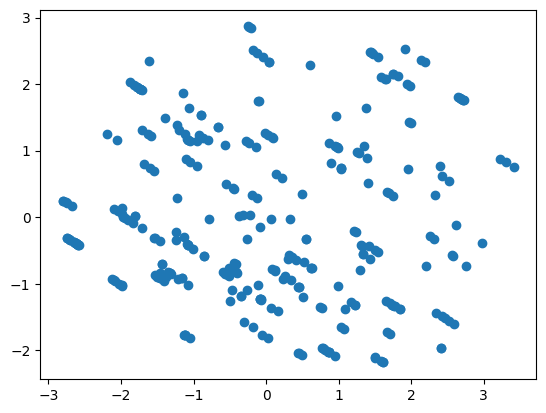

In [16]:
# plot between PCA1 and PCA2 
x = pca_values[:,0:1]
y = pca_values[:,1:2]
#z = pca_values[:2:3]
plt.scatter(x,y)

In [17]:
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:2],columns=['pc1','pc2']), lc_gender,lc_cancer], axis = 1)

In [18]:
finalDf

,pc1,pc2,GENDER,LUNG_CANCER
0,-0.599268,-0.826702,M,YES
1,-0.516755,-0.756583,M,YES
2,-1.050730,-1.814064,F,NO
3,1.973967,1.423273,M,NO
4,-0.415375,-0.711301,F,NO
...,...,...,...,...
304,-0.849509,-0.578837,F,YES
305,-2.695692,-0.341672,M,YES
306,-1.735667,1.927794,M,YES
307,-1.071154,-0.418096,M,YES


<Axes: xlabel='pc1', ylabel='pc2'>

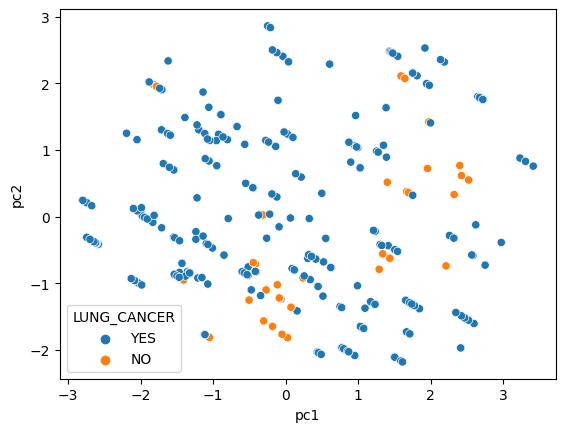

In [19]:
import seaborn as sns
sns.scatterplot(data=finalDf,x='pc1',y='pc2',hue='LUNG_CANCER')